In [91]:

# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [92]:
# Load dataset
from tkinter.font import names


url = "diabetes.csv"
columns = ['NoTimesPregnant','PlasmaGlucoseConc','DiastolicBloodPressure','TricepsSkinFoldThickness','SerumInsulin','BMI','DiabetesPedigreeFunction','Age','Diabetes'
]
df = pd.read_csv(url)
df.head()

,NoTimesPregnant,PlasmaGlucoseConc,DiastolicBloodPressure,TricepsSkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [93]:
#some info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NoTimesPregnant           768 non-null    int64  
 1   PlasmaGlucoseConc         768 non-null    int64  
 2   DiastolicBloodPressure    768 non-null    int64  
 3   TricepsSkinFoldThickness  768 non-null    int64  
 4   SerumInsulin              768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


There is no missing values in the data but som features has zero value wish should not be possible. They are Glucose, BloodPressure, Insulin, SkinThickness. so we need to delete this from the training data.

In [94]:
#Remove Collumns with zero values in Glucose, BloodPressure, Insulin, SkinThickness, BMI

for x in df.index:
    if df.loc[x,"PlasmaGlucoseConc"] == 0:
        df.drop(x, inplace=True)
for x in df.index:
    if df.loc[x,"DiastolicBloodPressure"] == 0:
        df.drop(x, inplace=True)
# for x in df.index:
#     if df.loc[x,"SerumInsulin"] == 0:
#         df.drop(x, inplace=True)
for x in df.index:
    if df.loc[x,"TricepsSkinFoldThickness"] == 0:
        df.drop(x, inplace=True)
for x in df.index:
    if df.loc[x,"BMI"] == 0:
        df.drop(x, inplace=True)
        #print(df.where(a = 0, axis=0))
#idx = np.argwhere(np.all(a))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NoTimesPregnant           532 non-null    int64  
 1   PlasmaGlucoseConc         532 non-null    int64  
 2   DiastolicBloodPressure    532 non-null    int64  
 3   TricepsSkinFoldThickness  532 non-null    int64  
 4   SerumInsulin              532 non-null    int64  
 5   BMI                       532 non-null    float64
 6   DiabetesPedigreeFunction  532 non-null    float64
 7   Age                       532 non-null    int64  
 8   Diabetes                  532 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 57.7+ KB


In [95]:
# Some basic statistical analysis about the data
df.describe()

,NoTimesPregnant,PlasmaGlucoseConc,DiastolicBloodPressure,TricepsSkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,3.516917,121.030075,71.505639,29.182331,114.988722,32.890226,0.502966,31.614662
std,3.312036,30.999226,12.310253,10.523878,123.007555,6.881109,0.344546,10.761584
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000
25%,1.000000,98.750000,64.000000,22.000000,0.000000,27.875000,0.258750,23.000000
50%,2.000000,115.000000,72.000000,29.000000,91.500000,32.800000,0.416000,28.000000
75%,5.000000,141.250000,80.000000,36.000000,165.250000,36.900000,0.658500,38.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000


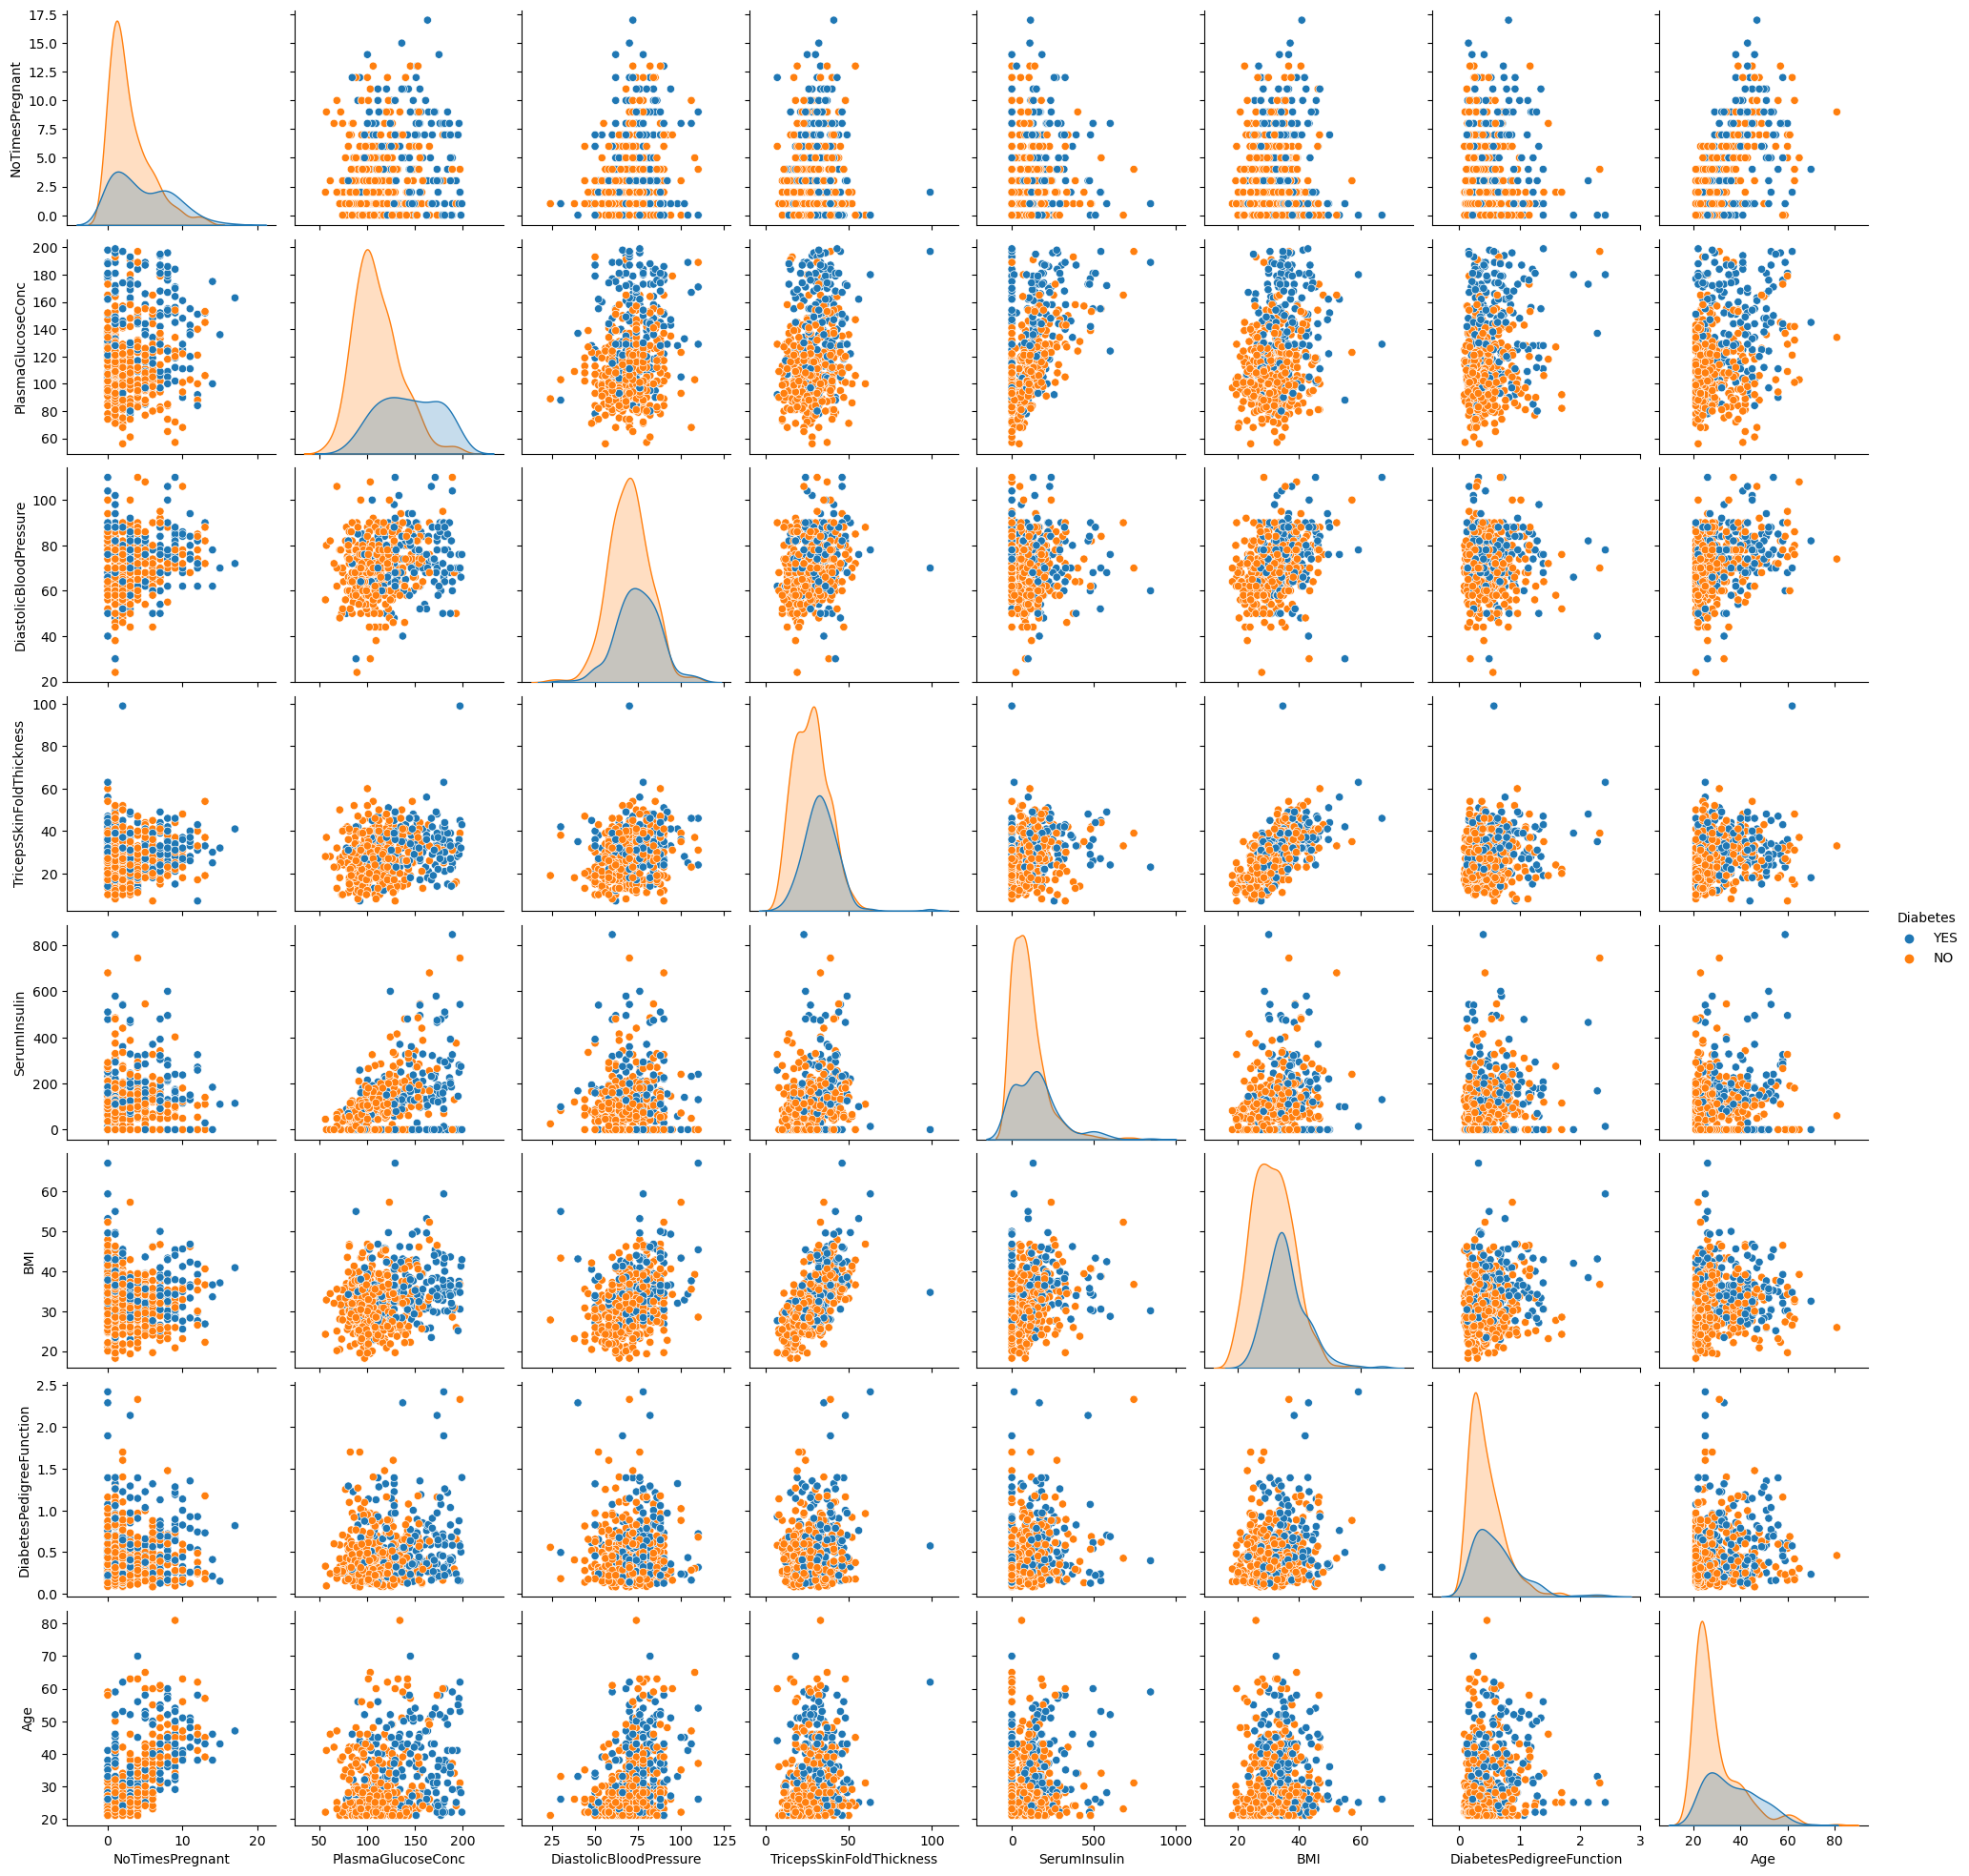

In [96]:
# Visualize the whole dataset
sns.pairplot(df, hue='Diabetes')

In [97]:
# Separate features and target, Dela på data och resultat/svar
data = df.values
X = data[:,0:8]
Y = data[:,8]

/tmp/ipykernel_634/215283095.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


<AxesSubplot: >

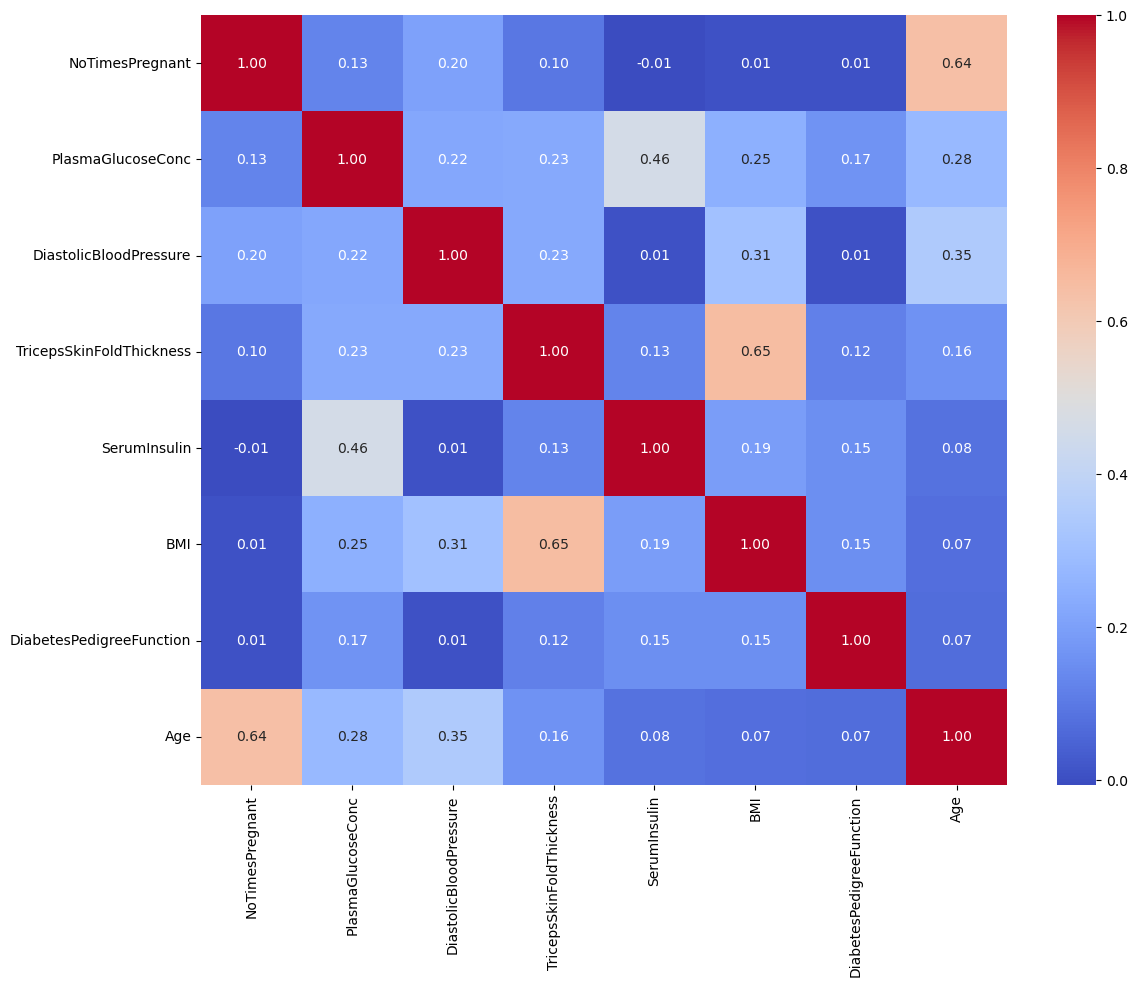

In [98]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [99]:
# Calculate average of each features for all classes
# numpy.average(a, axis=None, weights=None, returned=False, *, keepdims=<no value>)[source]
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))]) #För alla unika blommor
Y_Data_reshaped = Y_Data.reshape(2, 8)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

In [100]:

# Split the data to train and test dataset.
from random import random
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#Validate with CrossValidation

In [101]:
# Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.743411 (0.033293)
LDA: 0.766833 (0.044090)
KNN: 0.735714 (0.096054)
CART: 0.714839 (0.062768)
NB: 0.774031 (0.047718)
SVM: 0.663566 (0.008632)


In [102]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7289719626168224
[[59 14]
 [15 19]]
              precision    recall  f1-score   support

          NO       0.80      0.81      0.80        73
         YES       0.58      0.56      0.57        34

    accuracy                           0.73       107
   macro avg       0.69      0.68      0.68       107
weighted avg       0.73      0.73      0.73       107



In [103]:
#Testing the model
#NoTimesPregnant,PlasmaGlucoseConc,DiastolicBloodPressure,TricepsSkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
X_new = np.array([[7,196,90,0,0,39.8,0.451,41], [4,110,92,0,0,37.6,0.191,30]])
#Prediction of the species from the input vector
prediction = model.predict(X_new)
print("Prediction of diabetes: {}".format(prediction))

Prediction of diabetes: ['YES' 'NO']


In [104]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(model, f)

# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['YES', 'NO'], dtype='<U3')

#Reference
Some code and examples is taken from 
https://medium.com/geekculture/diabetes-prediction-using-machine-learning-python-23fc98125d8